In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optim
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
# 4/2gGpUlqgg9NPy4-f5xgIYXUkGWlIFWxVN8TqtKPi78q9-Fz2FLk_ejc

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
data = pd.read_csv('gdrive/My Drive/Working/Jupyter Notebooks/Data/covidar.csv', sep=',')
data = data[['date', 'total_deaths']]

data = data.reset_index(drop=False)
data.columns = ['timestep', 'date', 'total_deaths']
data

,timestep,date,total_deaths
0,0,3/4/2020,0
1,1,3/6/2020,0
2,2,3/7/2020,0
3,3,3/8/2020,1
4,4,3/9/2020,1
...,...,...,...
145,145,7/30/2020,3441
146,146,7/31/2020,3543
147,147,8/1/2020,3596
148,148,8/2/2020,3648


In [3]:
def my_logistic(t,a,b,c):
    return c/(1+a*np.exp(-b*t))

In [4]:
#p0 = np.random.exponential(size=3)
p0 = [500, 0.03, 25000]
print(p0)
#bounds = (0,[1001700.,3.,1000000.])
bounds = (0,[2500.,3.,27000.])
x = np.array(data['timestep']) + 1
y = np.array(data['total_deaths'])
(a,b,c),cov = optim.curve_fit(my_logistic,x,y,bounds=bounds,p0=p0)
print(a,b,c)

[500, 0.03, 25000]
878.1901051385369 0.03295839373820414 26999.999999999975


In [5]:
a1 = 680
b1 = 0.0321
c1 = 24747
data["date"].iloc[-1]

'8/3/2020'

Text(0, 0.5, 'Muertes')

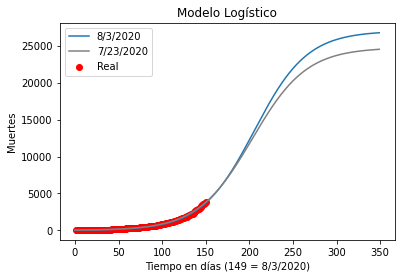

In [6]:
#x1 = np.arange(0,200,1)
x1 = np.arange(0,350,1)
plt.scatter(x, y, color='red')
plt.plot(x1, my_logistic(x1,a,b,c))
plt.plot(x1, my_logistic(x1,a1,b1,c1), color='grey')
plt.title('Modelo Logístico')
plt.legend([str(data["date"].iloc[-1]), '7/23/2020', 'Real'])
label = "Tiempo en días (" + str(data["timestep"].iloc[-1]) + ' = ' + str(data["date"].iloc[-1]) + ')'
plt.xlabel(label)
plt.ylabel('Muertes')

In [7]:
day=200
my_logistic(day,a,b,c)-my_logistic(day-1,a,b,c)

220.19553218032343

In [8]:
np.log(a)/b

205.64907212089594

## Pronóstico

In [9]:
day= 175
a1 = 680
b1 = 0.0321
c1 = 25000
print("Día:", day)
print("Proyectado Muertos Día:", my_logistic(day,a1,b1,c1)-my_logistic(day-1,a1,b1,c1))
print("Proyectado Muertos Tot:", my_logistic(day,a1,b1,c1))
print("")
print("Pico día:", np.log(a1)/b1)
print("Pico Muertos Día:", my_logistic(np.log(a1)/b1,a1,b1,c1)-my_logistic(np.log(a1)/b1-1,a1,b1,c1))
print("Pico Muertos Tot:", my_logistic(np.log(a1)/b1,a1,b1,c1))
print("")
print("-- Nueva Predicción Ajustada")
print("Día:", day)
print("Proyectado Muertos Día:", my_logistic(day,a,b,c)-my_logistic(day-1,a,b,c))
print("Proyectado Muertos Tot:", my_logistic(day,a,b,c))
print("")
print("Pico día:", np.log(a)/b)
print("Pico Muertos Día:", my_logistic(np.log(a)/b,a,b,c)-my_logistic(np.log(a)/b-1,a,b,c))
print("Pico Muertos Tot:", my_logistic(np.log(a)/b,a,b,c))



Día: 175
Proyectado Muertos Día: 163.46813452613787
Proyectado Muertos Tot: 7202.689778255379

Pico día: 203.18046100218544
Pico Muertos Día: 200.60777460772988
Pico Muertos Tot: 12499.999999999996

-- Nueva Predicción Ajustada
Día: 175
Proyectado Muertos Día: 172.7957187471511
Proyectado Muertos Tot: 7207.694121929624

Pico día: 205.64907212089594
Pico Muertos Día: 222.44902172060574
Pico Muertos Tot: 13499.999999999989
